---
# Module 6: Exemple de regroupement des données en analyse exploratoire des données
---

Dans ce script en Python, nous allons voir comment utiliser les méthodes de regroupement de données (*clustering*) et de réduction de la dimensionnalité des données pour mieux comprendre celles-ci.

Il est souvent nécessaire d'explorer les données avant d'utiliser des méthodes de classification ou de régression. Nous allons nous concentrer ici sur l'étape d'exploration des données.

Ce type d'analyse a un fort potentiel de découvertes puisqu'on l'utilise pour mettre en évidence des structures cachées dans les données. Par exemple, imaginez que vous analysez des données provenant d'une base de données cliniques de sujets atteints de la maladie d'Alzheimer. Vous découvrez que celles-ci peuvent être séparées en trois groupes distincts. En examinant les sujets de chaque groupe, vous découvrez qu'ils ont des caractéristiques différentes d'un groupe à l'autre. Vous venez ainsi de découvrir qu'il y a trois variantes de cette maladie! Une étude approfondie montrera peut-être que ce sont trois maladies qui se ressemblent, mais qui ont des causes différentes (virus, bactéries, environnement). C'est ainsi que se font les grandes découvertes en médecine, en astronomie, en chimie, etc. 

<p>&nbsp;</p>
<div align="center">
    <img src= https://drive.google.com/uc?id=1sso0KASSFUZmM7qtLrBg4TfD7LJNu6nZ  width="400" />
    <div>
    <font size="1.5">Image Source: https://educators.brainpop.com/bp-topic/galileo-galilei//</font>
    </div>
</div>
<p>&nbsp;</p>


Nous allons voir comment les outils de l'apprentissage automatique (principalement ceux de la bibliothèque [Scikit-learn](https://scikit-learn.org/stable/index.html)) nous permettent de réduire la dimension des variables d'entrée et de déterminer le nombre de groupes dans les données. 

Il faut aussi se rappeler que des données de dimension réduite permettent souvent d'obtenir de meilleures performances en classification et en régression.


### Informations sur la base de données.

Nous allons utiliser la base de données [Telecom Churn](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets) disponible sur le site de Kaggle. Elle contient de l'information sur 3 333 clients abonnés aux services téléphoniques d'une compagnie de télécom américaine. La variable à prédire est le désabonnement (*churn*) d'un client donné.

La base de données contient 20 variables qui ont été mesurées. Elle est déjà nettoyée et est souvent utilisée pour tester divers algorithmes de classification. 


<ul>
<li><b>state</b>: état,</li>
<li><b>account length</b>: longueur du dossier,</li>
<li><b>area code</b>: code postal,</li>
<li><b>phone number</b>: numéro de téléphone,</li>
<li><b>international plan</b>: plan d'appel international,</li>  
<li><b>voice mail plan</b>: plan de messagerie vocale,</li>
<li><b>number vmail messages</b>: nombre de messages vocaux,</li> 
<li><b>total day minutes</b>: total des minutes des appels de jour,</li>
<li><b>total day calls</b>: nombre d'appels de jour,</li>
<li><b>total day charge</b>: charge totale pour les appels de jour,</li>
<li><b>total eve minutes</b>: total des minutes des appels en soirée,</li>
<li><b>total eve calls</b>: nombre d'appels en soirée,</li>
<li><b>total eve charge</b>: charge totale pour les appels en soirée,</li>
<li><b>total night minutes</b>: total des minutes des appels de nuit,</li>
<li><b>total night calls</b>: nombre d'appels de nuit,</li>
<li><b>total night charge</b>: charge totale pour les appels de nuit,</li>
<li><b>total intl minutes</b>: total des minutes pour les appels internationaux,</li>
<li><b>total intl calls</b>: nombre d'appels internationaux,</li>
<li><b>total intl charge</b>: charge totale pour les appels internationaux ,</li>
<li><b>customer service calls</b>: nombre d'appels au service clientèle  ,</li>
<li><b>churn</b>: désabonnement.</li>
</ul>


### Étapes de l'exploration des données
Dans ce qui suit, nous allons effectuer les étapes suivantes:
<ol>
<li>nettoyage des données,</li>
<li>réduction de la dimension des données,</li>
<li>regroupement optimal des données,</li>
<li>interprétation des résultats.</li>
</ol>


### IMPORTANT: Copie du notebook!

Vous devez faire une copie du notebook dans votre drive avant de l'exécuter, car les modifications dans le notebook original ne seront pas sauvegardées. Vous travaillerez ainsi dans la copie et non dans l'original.


Importation des fichiers à utiliser dans le tutoriel.

In [1]:
%%bash
git clone https://github.com/Cours-EDUlib/IVADO-AA.git
mv IVADO-AA/module_6/* ./
rm -r IVADO-AA

Cloning into 'IVADO-AA'...


In [2]:
%%capture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Pour la reproductibilité des résultats
np.random.seed(23)

%config InlineBackend.figure_format = 'svg'

# Auteur: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

## Partie I: Lecture et préparation des données

Affichage des premières lignes du fichier. 


In [3]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Accélération des calculs si nécessaire

Vous pouvez réduire les temps de calcul en réduisant le nombre de données à traiter au moyen d'échantillonnage aléatoire du dataframe.
Vous n'avez qu'à décommenter la cellule suivate.

In [4]:
#df = df.sample(frac=0.3)

#### Élimination des variables inutiles et transformation des données

La variable *churn* est la réponse à prédire. Elle ne fait pas partie des variables d'entrées.

Les variables de coût (*charge*) sont redondantes puis que chacune est proportionnelle au nombre de minutes utilisées pour chaque type d'appel. 

La variable *phone number* est disparate dans le contexte de ce script et ne sera pas utilisée.

Les variables *state* et *area code* sont redondantes; on laisse tomber la première.

Les variables *international plan* et *voice mail plan* prennent les valeurs *yes* et *no*; elles seront transformées en valeurs entières 1 et 0.

In [5]:
# Sélection des variables d'entrée à utiliser
X = df.drop(['churn', 'state', 'phone number', 'total day charge', 'total eve charge', 
             'total night charge', 'total intl charge'], axis = 1)

# Conversion des variables catégoriques en entiers
X['international plan'] = X['international plan'].map({'yes':1, 'no':0})
X['voice mail plan'] = X['voice mail plan'].map({'yes':1,'no':0})

Affichage des premières lignes du dataframe contenant les 14 variables d'entrée sélectionnées. 

In [6]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


Les variables sont maintenant toutes numériques et peuvent être utilisées dans les méthodes de réduction de la dimensionnalité et de regroupement.

#### Normalisation des variables d'entrée. 

Il peut sembler bizarre de normaliser un code postal ou un indicateur de plan de téléphonie, mais ces variables sont maintenant traitées comme les autres.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Partie II: Détermination du nombre optimal de groupes avec la méthode k-moyennes

La méthode k-moyennes (*k-Means*) est la plus utilisée pour estimer le nombre de groupes dans un nuage de données multidimensionnel. Elle fait l'hypothèse que tous les groupes sont isotropes et ont la même dispersion spatiale. Bien que ce soit rarement le cas, le nombre de groupes estimé est souvent près de la réalité.

#### Définition d'une fonction affichant différentes métriques (ou mesures) statistiques de regroupement

On utilise deux métriques statistiques: le coefficient de [silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) et l'indice de [Davis-Bouldin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html).

Une bonne séparation d'un nuage de points en de multiples groupes compacts produit un coefficient de silhouette près de 1, et un indice de Davis-Bouldin près de 0.


In [8]:
def affiche_stats_regroupements(X_s):
    # Calcul des métriques de regroupement pour différents nombres de groupes
    silhouette = [] 
    davis_bouldin = []
    for k in range(2, 11):
        # Regroupement des données en k groupes
        estimator = KMeans(n_clusters=k, n_init=10)   
        estimator.fit(X_s)
        
        # Calcul des métriques pour ce regroupement
        silhouette.append(silhouette_score(X_s, estimator.labels_, metric='euclidean'))
        davis_bouldin.append(davies_bouldin_score(X_s, estimator.labels_))

    # Affichage des résultats
    ngroupes = range(2, 11)

    fig, axs = plt.subplots(2, 1, sharex=True, figsize = (6, 4)) 
    axs[0].plot(ngroupes, silhouette, 'o-')
    axs[0].set_ylabel('Silhouette');

    axs[1].plot(ngroupes, davis_bouldin, 'o-')
    axs[1].set_xlabel('Nombre de groupes', fontsize=16)
    axs[1].set_ylabel('Davis Bouldin');
    axs[1].set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10]);
    axs[1].set_xticklabels(['2', '3', '4', '5', '6', '7', '8', '9', '10']);

#### Affichage des statistiques de regroupements à partir des données originales en 14-D. 

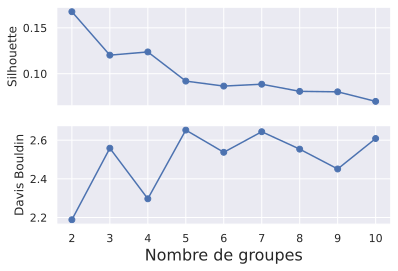

In [9]:
affiche_stats_regroupements(X_scaled)

Les faibles valeurs de coefficient de silhouette et les grandes valeurs d'indice de Davis-Bouldin indiquent que les 
groupes sont mal définis en 14-D.

## Réduction de la dimensionnalité

Dans ce qui suit, nous allons réduire la dimension des données afin d'améliorer les résultats de regroupements. Nous allons utiliser la méthode de plongement de données t-SNE, car elle performe souvent mieux que les autres méthodes.

L'idée de base est simple : transformer les données en haute dimension en nouvelles données 2-D (ou parfois 3-D) de sorte que les points qui étaient à l'origine très proches dans l'espace initial à n dimensions se retrouvent très proches sur le plan. 

#### Transformation des variables 14-D en 2-D

Cette opération prend du temps.

In [10]:
%%time
tsne = TSNE(init='random', learning_rate='auto', perplexity=100)
X_tsne = tsne.fit_transform(X_scaled)

CPU times: user 1min 23s, sys: 127 ms, total: 1min 23s
Wall time: 49.6 s


#### Affichage des statistiques de regroupements à partir des données t-SNE en 2-D.

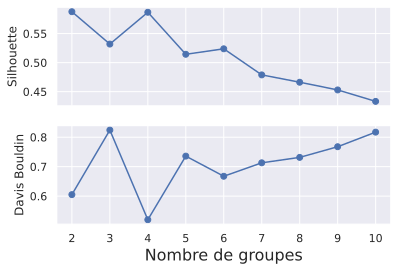

In [11]:
affiche_stats_regroupements(X_tsne)

Les valeurs de silhouette sont plus près de 1 que précédemment et celles de l'indice de Davis-Bouldin sont plus près de 0.

On remarque que la courbe de silhouette passe par deux maximas, pour 4 et 6 groupes. La courbe de l'indice de Davis-Bouldin passe par deux minimas aux mêmes endroits. Les deux indices concordent sur le nombre optimal de groupes!

#### Pourquoi y a-t-il deux nombres de groupes possibles?

Affichons d'abord les deux composantes t-SNE.

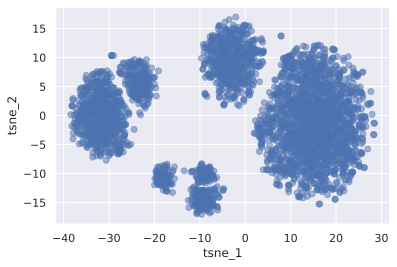

In [12]:
fig, ax = plt.subplots()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5);
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
plt.show()

Les données sont bien séparées en différents groupes. Combien de groupes voyez-vous?

Affichons la solution à quatre groupes. Nous allons maintenant utiliser la méthode des mélanges gaussiens (*Gaussian mixtures*) pour mieux regrouper les données. Elle fait l'hypothèse que tous les groupes différents entre eux et sont anisotropes; c'est souvent le cas en pratique. Dans cet exemple, on n'a pas besoin d'un grand nombre d'essais (*n_init*) pour trouver le meilleur regroupement. 

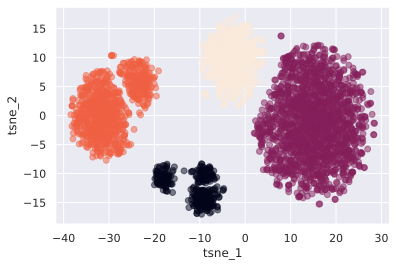

In [13]:
estimator = GaussianMixture(n_components=4, random_state=0, n_init=10) 
labels = estimator.fit_predict(X_tsne)

fig, ax = plt.subplots()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, alpha=0.5);
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
plt.show()

Plusieurs groupes voisins sont fusionnés ensemble.

Affichons maintenant la solution à six groupes. Cette opération requiert un grand nombre d'essais (*n_init*) pour trouver le meilleur regroupement. Cela prend du temps.

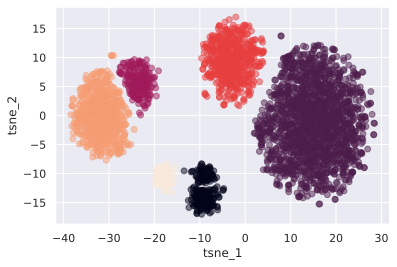

In [14]:
estimator = GaussianMixture(n_components=6, random_state=0, n_init=1000)   
labels = estimator.fit_predict(X_tsne)

fig, ax = plt.subplots()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, alpha=0.5);
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
plt.show()

Les groupes sont maintenant bien séparés. On pourrait utiliser un plus grand nombre de groupes, mais cela séparerait inutilement le plus grand amas en de plus petits.

# Partie III: Interprétation des résultats

On voit que la méthode t-SNE a bien séparé les données 14-D en groupes 2-D distincts. C'est un exemple où la méthode marche plutôt bien.

La méthode t-SNE est ainsi souvent utilisée comme outil d'exploration des données.

#### Quels sont les clients qui ont résilié leur contrat?

Affichons en rouge les clients qui ont résilié leur contrat et en vert les autres clients. 

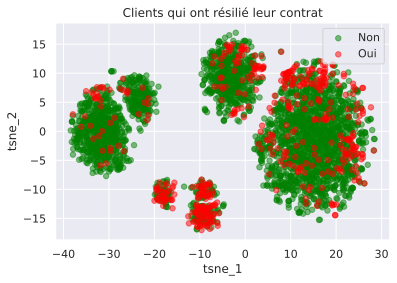

In [15]:
fig, ax = plt.subplots()

idx = df.index[df['churn']==False].tolist()
ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1],
            c='green', label='Non', alpha=0.5, s=30);

idx = df.index[df['churn']==True].tolist()
ax.scatter(X_tsne[idx, 0], X_tsne[idx, 1],
            c='red', label='Oui', alpha=0.5, s=30);

plt.legend()
ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_title('Clients qui ont résilié leur contrat')
plt.show()

Les clients problématiques sont répartis *dans tous les amas*; ils correspondent à *différents types de consommateurs* pouvant résilier ou non leur contrat.

#### Peut-on identifier les différents groupes de consommateurs?

Affichons en orange les clients ayant pris un plan de téléphonie particulier et en bleu les autres. 

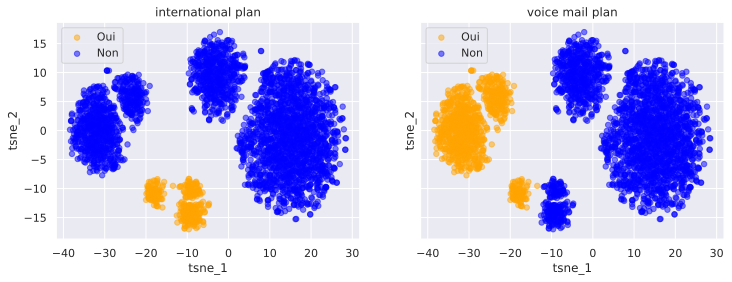

In [16]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,4))

for i, name in enumerate(['international plan', 'voice mail plan']):
    idx = df.index[df[name]=='yes'].tolist()
    axes[i].scatter(X_tsne[idx, 0], X_tsne[idx, 1],
                c='orange', label='Oui', alpha=0.5, s=30);

    idx = df.index[df[name]=='no'].tolist()
    axes[i].scatter(X_tsne[idx, 0], X_tsne[idx, 1],
                c='blue', label='Non', alpha=0.5, s=30);

    axes[i].legend()
    axes[i].set_xlabel('tsne_1')
    axes[i].set_ylabel('tsne_2')
    axes[i].set_title(name)

plt.show()

La figure montre, pour un plan de téléphonie donné, que les clients sont répartis en plusieurs groupes au lieu d'un seul.

Une analyse détaillée des variables X des clients appartenant à chaque groupe permettrait d'associer un groupe à une classe de consommateurs distincts. Ce type d'analyse, ou de segmentation de marché, est souvent effectué en markéting. 

# Partie IV:  Conclusion

On a vu que les méthodes de regroupement et de réduction de la dimensionnalité sont de puissants outils d'exploration des données. 

**ATTENTION**: Les résultats présentés ici sont sensibles aux valeurs aléatoires utilisées lors des calculs. Pour vous en convaincre, relancez le script.

Vous devriez observer des groupes différents orientés différemment. Pour cette raison, la méthode t-SNE est dangereuse à utiliser en classification! Toutefois, les différents types de consommateurs similaires devraient réapparaitre dans l'un ou l'autre des groupes. À vous de les identifier et d'utiliser ces résultats dans de nouvelles analyses.

Bonnes explorations!